In [ ]:
#!pip3 install astroquery

In [ ]:
#written by @redboxup

In [ ]:
from astroquery.gaia import Gaia
from astropy import units as u
from astropy.table import Table
import pandas as pd
import numpy as np
from astropy.coordinates import Distance
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

Note: The query to the archive is with ADQL (Astronomical Data Query Language)

In [ ]:
query = f"SELECT * \
FROM gaiadr3.gaia_source \
WHERE \
CONTAINS( \
    POINT('ICRS',gaiadr3.gaia_source.ra,gaiadr3.gaia_source.dec), \
    CIRCLE('ICRS',132.8460000, 11.8140000,0.25))=1"

In [ ]:
job = Gaia.launch_job_async(query)

INFO:astroquery:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


In [ ]:
results = job.get_results()

In [ ]:
print(f'Table size (rows): {len(results)}')

Table size (rows): 2101


In [ ]:
results

solution_id,DESIGNATION,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pm,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,nu_eff_used_in_astrometry,pseudocolour,pseudocolour_error,ra_pseudocolour_corr,dec_pseudocolour_corr,parallax_pseudocolour_corr,pmra_pseudocolour_corr,pmdec_pseudocolour_corr,astrometric_matched_transits,visibility_periods_used,astrometric_sigma5d_max,matched_transits,new_matched_transits,matched_transits_removed,ipd_gof_harmonic_amplitude,ipd_gof_harmonic_phase,ipd_frac_multi_peak,ipd_frac_odd_win,ruwe,scan_direction_strength_k1,scan_direction_strength_k2,scan_direction_strength_k3,scan_direction_strength_k4,scan_direction_mean_k1,scan_direction_mean_k2,scan_direction_mean_k3,scan_direction_mean_k4,duplicated_source,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_bp_n_contaminated_transits,phot_bp_n_blended_transits,phot_rp_n_contaminated_transits,phot_rp_n_blended_transits,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_method_used,rv_nb_transits,rv_nb_deblended_transits,rv_visibility_periods_used,rv_expected_sig_to_noise,rv_renormalised_gof,rv_chisq_pvalue,rv_time_duration,rv_amplitude_robust,rv_template_teff,rv_template_logg,rv_template_fe_h,rv_atm_param_origin,vbroad,vbroad_error,vbroad_nb_transits,grvs_mag,grvs_mag_error,grvs_mag_nb_transits,rvs_spec_sig_to_noise,phot_variable_flag,l,b,ecl_lon,ecl_lat,in_qso_candidates,in_galaxy_candidates,non_single_star,has_xp_continuous,has_xp_sampled,has_rvs,has_epoch_photometry,has_epoch_rv,has_mcmc_gspphot,has_mcmc_msc,in_andromeda_survey,classprob_dsc_combmod_quasar,classprob_dsc_combmod_galaxy,classprob_dsc_combmod_star,teff_gspphot,teff_gspphot_lower,teff_gspphot_upper,logg_gspphot,logg_gspphot_lower,logg_gspphot_upper,mh_gspphot,mh_gspphot_lower,mh_gspphot_upper,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,azero_gspphot,azero_gspphot_lower,azero_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,ebpminrp_gspphot,ebpminrp_gspphot_lower,ebpminrp_gspphot_upper,libname_gspphot
,,,,yr,deg,mas,deg,mas,mas,mas,,mas / yr,mas / yr,mas / yr,mas / yr,mas / yr,,,,,,,,,,,,,,,,,mas,,,,1 / um,1 / um,1 / um,,,,,,,,mas,,,,,deg,,,,,,,,deg,deg,deg,deg,,,electron / s,electron / s,,mag,,electron / s,electron / s,,mag,,electron / s,electron / s,,mag,,,,,,,mag,mag,mag,km / s,km / s,,,,,,,,d,km / s,K,log(cm.s**-2),dex,,km / s,km / s,,mag,mag,,,,deg,deg,deg,deg,,,,,,,,,,,,,,,K,K,K,log(cm.s**-2),log(cm.s**-2),log(cm.s**-2),dex,dex,dex,pc,pc,pc,mag,mag,mag,mag,mag,mag,mag,mag,mag,
int64,object,int64,int64,float64,float64,float32,float64,float32,float64,float32,float32,float32,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,int16,float32,float32,float32,float32,int16,bool,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,float32,int16,int16,int16,float32,float32,int16,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,bool,int16,float64,float32,float32,float32,int16,float64,float32,float32,float32,int16,float64,float32,float32,float32,float32,int16,int16,int16,int16,int16,float32,float32,float32,float32,float32,int16,int16,int16,int16,float32,float32,float32,float32,float32,float32,float32,float32,

In [ ]:
#Converting to a dataframe
df = results.to_pandas()

In [ ]:
#Let us keep only specific columns for our purpose
df = df[['ra','dec','pmra','pmdec','parallax',
        'bp_rp','phot_g_mean_mag','radial_velocity']]

In [ ]:
df

,ra,dec,pmra,pmdec,parallax,bp_rp,phot_g_mean_mag,radial_velocity
0,132.881372,11.616982,NaN,NaN,NaN,1.579786,21.138096,NaN
1,132.747652,11.914517,NaN,NaN,NaN,1.083797,15.822470,NaN
2,132.823284,11.731291,-0.681158,-5.993880,-0.085869,1.027016,20.052446,NaN
3,132.902925,11.570616,0.771359,5.086297,1.394759,2.271490,19.251522,NaN
4,132.909668,11.574322,-11.145549,-2.796321,1.147851,1.455070,16.549810,NaN
...,...,...,...,...,...,...,...,...
2096,132.902695,12.053764,-11.218959,-2.944345,1.187909,1.850840,17.691051,NaN
2097,132.909014,12.047674,NaN,NaN,NaN,1.830292,21.449282,NaN
2098,132.905568,12.055401,-10.802870,-2.908853,1.159743,0.744475,13.560873,31.130911
2099,132.868242,12.054595,-14.625096,11.435698,3.236483,0.896152,12.804457,18.650688


In [ ]:
#removing rows which have nan values for pmra and pmdec
df = df.dropna(subset = ['pmra','pmdec'])

In [ ]:
#Now let us plot the proper motion of the stars

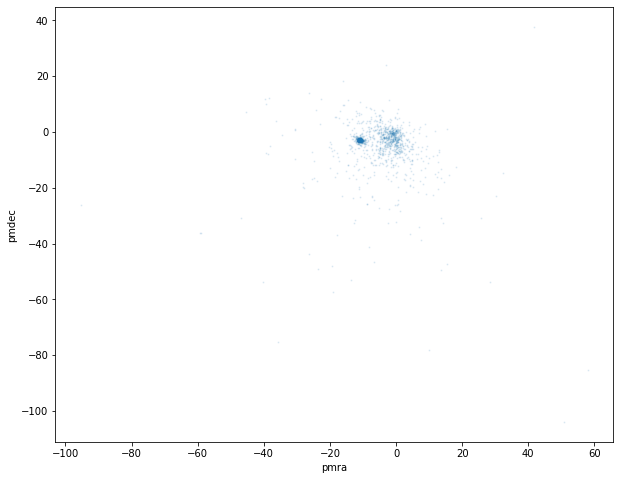

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(df.iloc[:, 2], df.iloc[:, 3],alpha=0.1, s = 1)
plt.xlabel(df.columns[2])
plt.ylabel(df.columns[3])
plt.show()

In [ ]:
#let us change the x and y limits of the plot

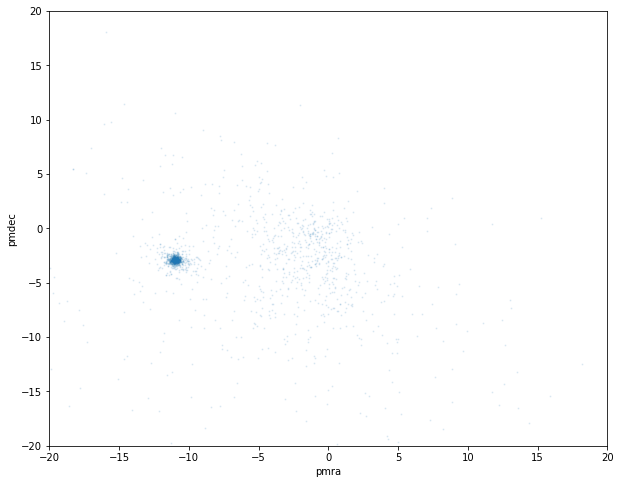

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(df.iloc[:, 2], df.iloc[:, 3],alpha=0.1, s = 1)
plt.xlabel(df.columns[2])
plt.ylabel(df.columns[3])
plt.xlim(-20,20)
plt.ylim(-20,20)
plt.show()

In [ ]:
#Rewriting to a numpy array
df_ = df[['pmra','pmdec']]
X = df_.to_numpy()

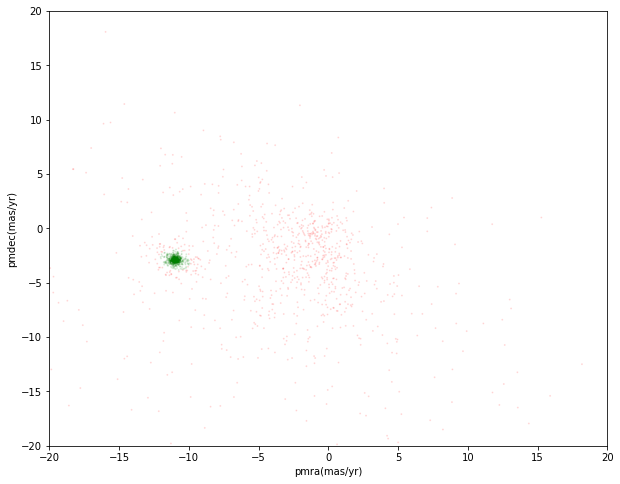

In [ ]:
#Write Gaussian Mean Mixture model to seperate the stars belonging to the open cluster from the background stars


In [ ]:
#Now, isolate all the stars belonging to the open cluster


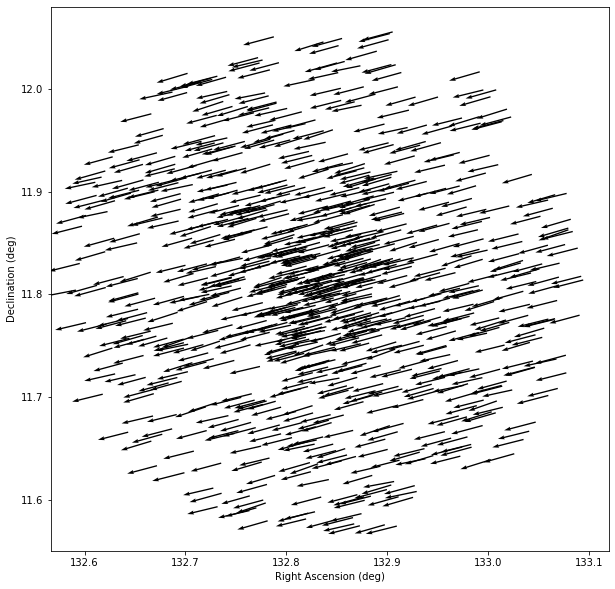

In [ ]:
#Use Quiverplot to observe proper motion


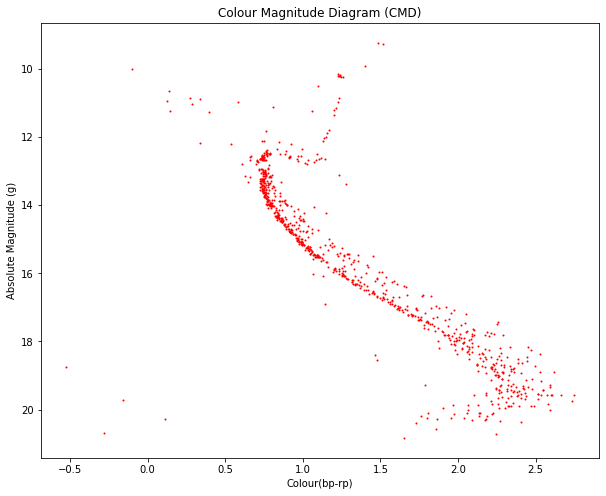

In [ ]:
#plot bp_rp vs phot_g_mean_magnitude to obtain color magnitude diagram (HR Diagram)
#Also invert the y-axis
